In [51]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import time

from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [52]:
#Load Dataset
from emnist import extract_training_samples
from emnist import extract_test_samples
X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')
print('X_train shape: ', str(X_train.shape))
print('y_train shape: ', str(y_train.shape))
print('X_test shape: ', str(X_test.shape))
print('y_test shape: ', str(y_test.shape))

X_train shape:  (124800, 28, 28)
y_train shape:  (124800,)
X_test shape:  (20800, 28, 28)
y_test shape:  (20800,)


In [53]:
#Convert labels to m dimensional vectors for printing 
y_train_vec = y_train.reshape(-1,1)
y_test_vec = y_test.reshape(-1,1)
print('y_train_vec shape: ', str(y_train_vec.shape))
print('y_test_vec shape: ', str(y_test_vec.shape))

y_train_vec shape:  (124800, 1)
y_test_vec shape:  (20800, 1)


In [54]:
#Change label mapping from 1-26 to 0-25 to avoid invalid range error due to TF's start-at-0 tagging (meaning if you have 26 classes, there should be no 26 label)
y_train = y_train - 1
y_test = y_test - 1
y_train_vec = y_train_vec - 1
y_test_vec = y_test_vec - 1

In [55]:
#Verify labels
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [56]:
#save label names
class_names = ['a','b','c','d','e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
len(class_names)

26

In [57]:
#Function to display sample image 
def dispSample(x,y,samp_index):
    plt.figure()
    plt.imshow(x[samp_index],cmap=mpl.cm.binary)
    plt.grid(False)
    plt.axis(False)
    plt.tight_layout()
    plt.show()
    true_class = ["a" if label == 0 else "b" if label == 1 else "c" if label == 2 else "d" if label == 3 else "e" if label == 4 else "f" if label == 5 else "g" if label == 6 else "h" if label == 7 else "i" if label == 8 else "j" if label == 9 else "k" if label == 10 else "l" if label == 11 else "m" if label == 12 else "n" if label == 13 else "o" if label == 14 else "p" if label == 15 else "q" if label == 16 else "r" if label == 17 else "s" if label == 18 else "t" if label == 19 else "u" if label == 20 else "v" if label == 21 else "w" if label == 22 else "x" if label == 23 else "y" if label == 24 else "z" for label in y[samp_index]]
    print('\nTrue Classification: {0}'.format(true_class[0]))

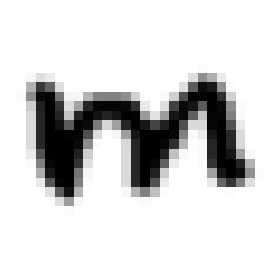


True Classification: m


In [58]:
dispSample(X_test,y_test_vec,10055)

In [59]:
#Preprocess data through feature scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [60]:
#Building NN Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #this flattens the 28 x 28 image to a 784 pixel vector
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

In [61]:
#Compiling our model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
#Fitting our model
t0 = time.perf_counter()
model.fit(X_train, y_train, epochs=15)
t1 = time.perf_counter()
print('\nTotal Training Duration: {0} seconds'.format(t1-t0))

Epoch 1/15
3900/3900 [==============================] - 4s 977us/step - loss: 1.1111 - accuracy: 0.6826
Epoch 2/15
3900/3900 [==============================] - 3s 871us/step - loss: 0.4749 - accuracy: 0.8552
Epoch 3/15
3900/3900 [==============================] - 3s 807us/step - loss: 0.3895 - accuracy: 0.8776
Epoch 4/15
3900/3900 [==============================] - 3s 818us/step - loss: 0.3478 - accuracy: 0.8895
Epoch 5/15
3900/3900 [==============================] - 3s 849us/step - loss: 0.3233 - accuracy: 0.8975
Epoch 6/15
3900/3900 [==============================] - 3s 815us/step - loss: 0.3016 - accuracy: 0.9038
Epoch 7/15
3900/3900 [==============================] - 3s 817us/step - loss: 0.2875 - accuracy: 0.9072
Epoch 8/15
3900/3900 [==============================] - 3s 822us/step - loss: 0.2778 - accuracy: 0.9099
Epoch 9/15
3900/3900 [==============================] - 3s 823us/step - loss: 0.2659 - accuracy: 0.9129
Epoch 10/15
3900/3900 [==============================] - 3s 832u

In [63]:
test_loss, test_acc = model.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

650/650 [==============================] - 0s 530us/step - loss: 0.4083 - accuracy: 0.8854
Test accuracy: 0.8854327201843262


In [64]:
#Function to display test sample and model's predictio
def classifyLetter(x,y_vec,index):
    predictions = model.predict(x) #predictions.shape = 10000 x 10
    dispSample(x,y_vec,index)
    print('Predicted Letter: ', str(class_names[np.argmax(predictions[index])]))
    

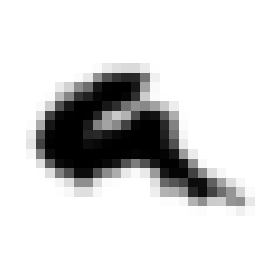


True Classification: a
Predicted Letter:  a


In [66]:
classifyLetter(X_test,y_test_vec,0)
